In [ ]:
Defining Objective:

Use haberman's data set to Perform EDA
To perform High level statistics of the dataset and find out number of points, numer of features, number of classes, data-points per class.
Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
To know which feature will be the better for classification of the survival status of the patient after one undergoes a surgery

# 1. Loading the Haberman's cancer survival data set in python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman = pd.read_csv(R"D:\Analytics Files\haberman.csv")

# 2. Performing statisitcs on the dataset¶

# 2.1 Finding out no. of features, data points and column names of the data set

In [2]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [17]:
print('shape of the dataset:')
print(haberman.shape)

print('column names of the dataset:')
print(haberman.columns)

shape of the dataset:
(306, 4)
column names of the dataset:
Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [ ]:
Observation:

There are 306 datapoints (rows) and 4 columns
The name of the columns are age, year, nodes and status

In [4]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
haberman.nunique

<bound method DataFrame.nunique of      age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]>

In [7]:
haberman['status'].unique()

array([1, 2], dtype=int64)

In [8]:
haberman.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

# 2.2 Domain Knowlegde and data insights:


In [ ]:
1.age: It represent the age of patient at which they undergone surgery
2.year: Year in which patient was undergone surgery
3.nodes: nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading
4.Status: It represent whether patient survive more than 5 years or less after undergone through surgery. Here if patients survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2.
Here age, year, nodes are the features and status consists the classes of the Haberman's data set. So, this data set has 3 fetaures and 2 classes (status 1 and status 2)

# 2.3 Finding out no. of data points per class and range of features in the data set



In [10]:
haberman['status'].value_counts()

status
1    225
2     81
Name: count, dtype: int64

In [11]:
print(haberman['age'].max())
print(haberman['age'].min())
print(haberman['year'].max())
print(haberman['year'].min())
print(haberman['nodes'].max())
print(haberman['nodes'].min())

83
30
69
58
52
0


# 2.4 Conclusion from the statistics performed on the dataset:

In [ ]:
1.There are 306 datapoints (rows) and 4 columns
2.The name of the columns are age, year, nodes and status1.
3.There are 225 data points for class 1 (status 1) and 81 data points for class 2 (status 2) i.e 225 patients survived for 5 years or more after the surgery (status 1) and 81 patients survived for less than 5 years after the surgery (status 2).
4.It is an unbalanced dataset
5.The range of Age is from 30- 83
6.The range of data points for Year of surgury is from 1958 to 1969
7.The range of node value is from 0 to 52

# 3.1 Plotting 2D scatter plot

2D scatter plot of nodes vs age


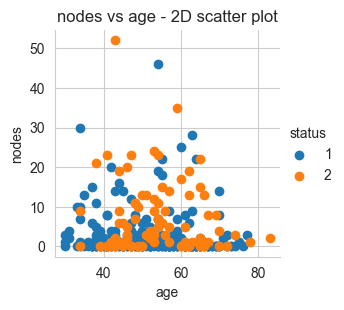

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='status').map(plt.scatter,'age','nodes').add_legend()
print('2D scatter plot of nodes vs age')
plt.title('nodes vs age - 2D scatter plot')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

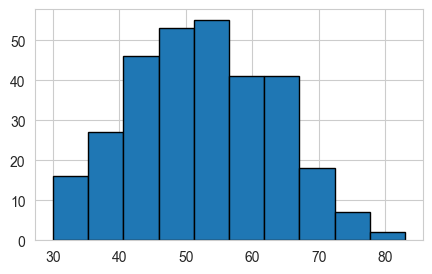

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))
plt.hist(haberman["age"],bins=10,edgecolor='black')
plt.grid(True)
plt.show

In [ ]:
OBSERVATIONS:

1.Using a combination of age and nodes we cannot distinguish between the survival status of 1 and 2 just be making a straight line

# 3.2 Plotting Pair Plots

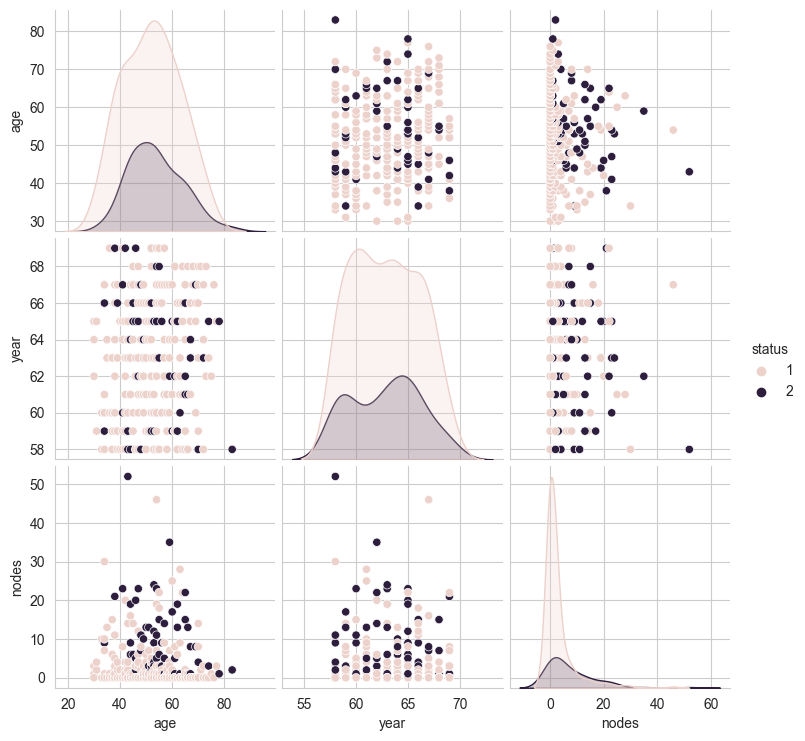

In [25]:
sns.set_style('whitegrid')
sns.pairplot(haberman, hue = 'status', vars=['age','year','nodes'])
plt.show()

# 3.3 Conclusion from Bivariate analysis (scatter plots and 2D pair plots):
There are 3 unique pair-plots in the plot matrix with a combination of nodes-age, nodes-year and year-age
In any of the combination of the pair-plots the survival status cannot be easily differentiated
So, since, 2-D pair plots are not giving any clear insights for classification of the data set as there is lot of overlapping of the data points. So, moving to 1-D plots to understand how can we classify the survival status based on individual features

# 4. Univariate Analysis on the dataset¶

# 4.1.1 Histogram and PDF plot of Nodes

Bar plot for nodes and status


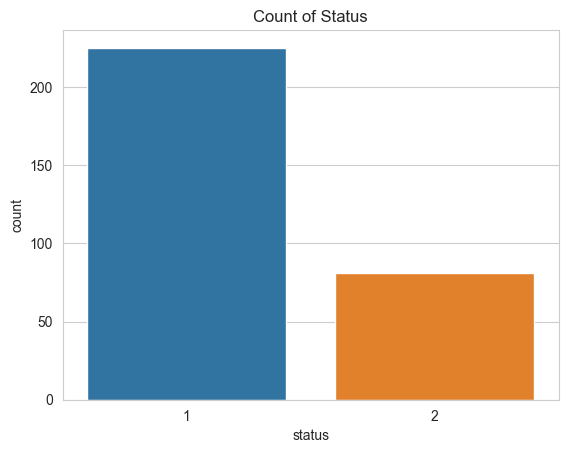

In [30]:
haberman_1= haberman.loc[haberman['status'] == 1]
haberman_2= haberman.loc[haberman['status'] == 2]


print('Bar plot for nodes and status')
sns.countplot(data=haberman, x='status')
plt.title('Count of Status')
plt.show()

In [ ]:
Observation:

Maximum no.of pateints of type status 1 have 0 nodes
Maximum no.of pateints of type status 2 also have 0 nodes
For both the type of patients majority of them lie in the range of 0-25 of nodes
For nodes 0 to 5 the no. of data points of patients being of"status 1" is higher tham that of "status 2"
For nodes 5 to 30 the no. of data points of patients being of "status 2" is higher tham that of "status 1"

Histogram plot for age and status


C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

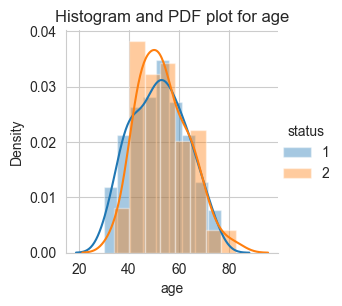

In [31]:
print('Histogram plot for age and status')

sns.FacetGrid(haberman, hue = 'status').map(sns.distplot, 'age').add_legend()
plt.title('Histogram and PDF plot for age')
plt.show()

In [ ]:
Observation:

Maximum no. of pateints of type status 1 is of age 52
The patients of age 30- 34 are purely of status 1
Maximum no. of pateints of type status 2 is of age 40
The patients of age 78-83 are purely of status 2
For age range from 34-42 the probalibility of pateint being of "status 1" is higher tham that of "status 2"
For age range from 42-56 the probalibility of pateint being of "status 2" is higher tham that of "status 1"
For age range from 56-78 the probalibility of of both the pateints is same since the pdf plots are almost overlapping each other
For patient's age ranging from 34- 78 status 1 and 2 overlap each each and we can only say that whihc type of pitients has a high probability to lie in this region but it is diddficult to completely classify the patients in this range

# 4.1.3 Histogram and PDF plot of Year

Histogram plot for year and status


C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

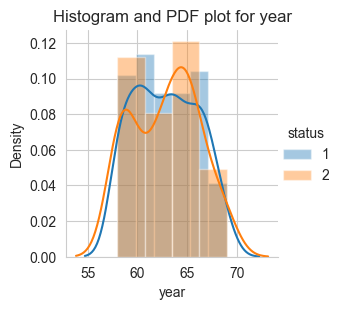

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('Histogram plot for year and status')

sns.FacetGrid(haberman, hue = 'status').map(sns.distplot, 'year').add_legend()
plt.title('Histogram and PDF plot for year')
plt.show()

In [ ]:
Observation:

Both the type of patients were found who have undergone a surgery between 1958 to 1969
Maximum no. of status 1 pateints were found in the period of 1960-61
Maximum no. of status 2 pateints were found in the period of 1964-66
From 1959-1963 and from 1966-1969 the the probalibility of pateint being of "status 1" is higher tham that of "status 2"
From 1958-1959 and from 1963-1966 the the probalibility of pateint being of "status 2" is higher than that of "status 1"

# 4.2 PDF and CDF plots

# 4.2.1 PDF and CDF plot of Nodes

haberman_1
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
haberman_2
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]

CDF plot of nodes


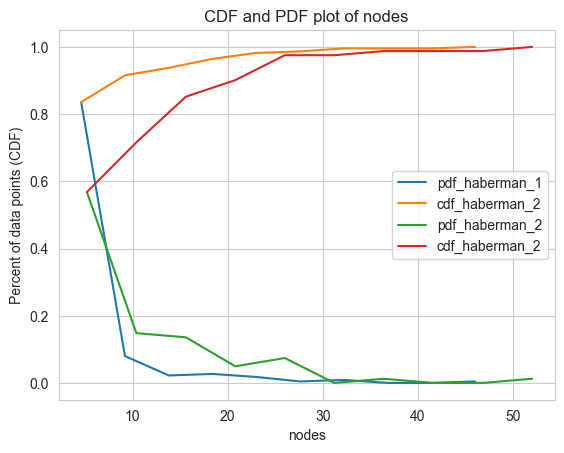

In [34]:
import numpy as np
import matplotlib.pyplot as plt

#haberman_1
counts,bin_edges = np.histogram(haberman_1['nodes'],bins = 10, density = True )

pdf= counts/sum(counts)
print('haberman_1')
print(pdf)
print(bin_edges)

#compute cdf

cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf_haberman_1')
plt.plot(bin_edges[1:],cdf,label='cdf_haberman_2')
plt.legend(loc='best')


#haberman_2
counts,bin_edges = np.histogram(haberman_2['nodes'],bins = 10, density = True )

pdf= counts/sum(counts)
print('haberman_2')
print(pdf)
print(bin_edges)

#compute cdf

cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf_haberman_2')
plt.plot(bin_edges[1:],cdf,label='cdf_haberman_2')
plt.legend(loc='best')


print('\nCDF plot of nodes')
plt.xlabel('nodes')
plt.ylabel('Percent of data points (CDF)')
plt.title('CDF and PDF plot of nodes')
plt.show()

In [ ]:
Observation:

nodes <= 5 comprises of 85% ( 190 out of 225) of the total patients having status as 1 and it also comprisesof 56% (46 out of 81) of the total patients having status as 2
So for nodes > 5 consists only 15% (35 out of 225) of patients with status 1 and 44% (35 out of 81) of patients having status 2
Deduction:

With node 5 as the boundary condition "status 1" patients have 85% accuracy and "status 2" patients have 44% accuracy

# 4.2.2 PDF and CDF plot of Age

haberman_1
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
haberman_2
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]

CDF plot of age


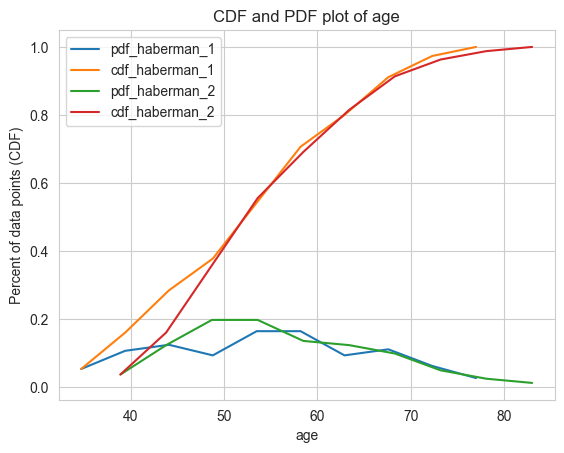

In [35]:
import numpy as np
import matplotlib.pyplot as plt

#haberman_1
counts,bin_edges = np.histogram(haberman_1['age'],bins = 10, density = True)

pdf= counts/sum(counts)
print('haberman_1')
print(pdf)
print(bin_edges)

#compute cdf

cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf_haberman_1')
plt.plot(bin_edges[1:],cdf,label='cdf_haberman_1')
plt.legend(loc='best')


#haberman_2
counts,bin_edges = np.histogram(haberman_2['age'],bins = 10, density = True)

pdf= counts/sum(counts)
print('haberman_2')
print(pdf)
print(bin_edges)

#compute cdf

cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf_haberman_2')
plt.plot(bin_edges[1:],cdf,label='cdf_haberman_2')
plt.legend(loc='best')

print("\nCDF plot of age")
plt.xlabel('age')
plt.ylabel('Percent of data points (CDF)')
plt.title('CDF and PDF plot of age')
plt.show()

In [ ]:
Observation:

The age range of 30- 34 comprises purely of "status 1" patients but it only comprises of 15% of the total patients of "status 1".
The age range of 78- 83 comprises purely of "status 2" patients but it only comprises of 2% of the total patients of "status 2".
The cdf plot of both the types of patients grows simlateneously against age.
Deduction:

Since the cdf plot of both the types of patients grows simlateneously against age and thus setting any boundary condition will almost give the same accuracy percentage for both the types of patients and this will result in only a 50% chance being accurate in the prediction and which does not help here as since there are only two cases and predicting without any analysis also gives a 50% chance of being correct.

# 4.2.3 PDF and CDF plot of Year

haberman_1
[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
haberman_2
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

CDF plot of year


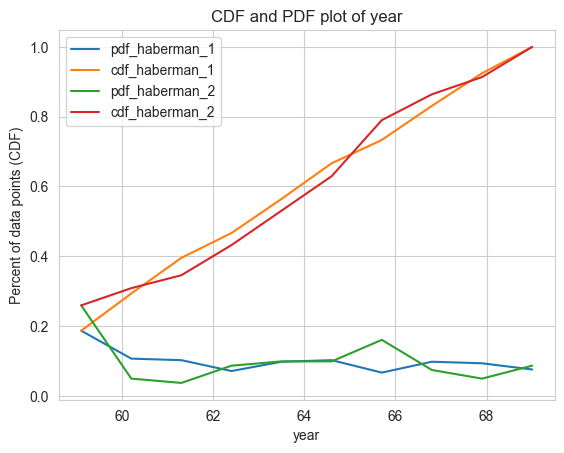

In [36]:
import numpy as np
import matplotlib.pyplot as plt

#haberman_1
counts,bin_edges = np.histogram(haberman_1['year'],bins = 10, density = True)

pdf= counts/sum(counts)
print('haberman_1')
print(pdf)
print(bin_edges)

#compute cdf

cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf_haberman_1')
plt.plot(bin_edges[1:],cdf,label='cdf_haberman_1')
plt.legend(loc='best')

#haberman_2
counts,bin_edges = np.histogram(haberman_2['year'],bins = 10, density = True)

pdf= counts/sum(counts)
print('haberman_2')
print(pdf)
print(bin_edges)

#compute cdf

cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf_haberman_2')
plt.plot(bin_edges[1:],cdf,label='cdf_haberman_2')
plt.legend(loc='best')

print('\nCDF plot of year')
plt.xlabel('year')
plt.ylabel('Percent of data points (CDF)')
plt.title('CDF and PDF plot of year')
plt.show()

In [ ]:
Observation:

The cdf plot of both the types of patients grows simlateneously against year of surgery.
Deduction:

Since the cdf plot of both the types of patients grows simlateneously against age and thus setting any boundary condition will almost give the same accuracy percentage for both the types of patients and this will result in only a 50% chance being accurate in the prediction and which does not help here as since there are only two cases and predicting without any analysis also gives a 50% chance of being correct.

# 4.3 Violin and Box plots

Violin plot for nodes


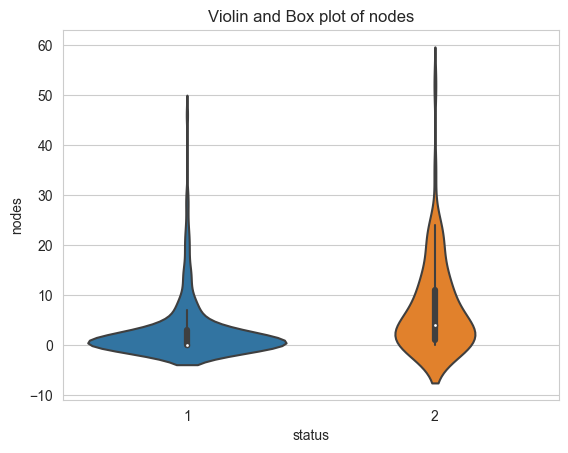

Violin plot for age


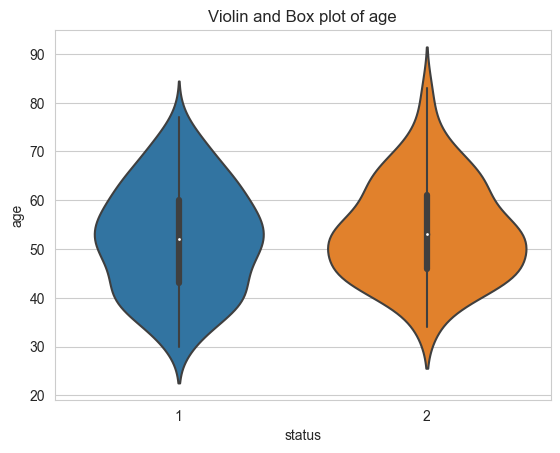

Violin plot for year


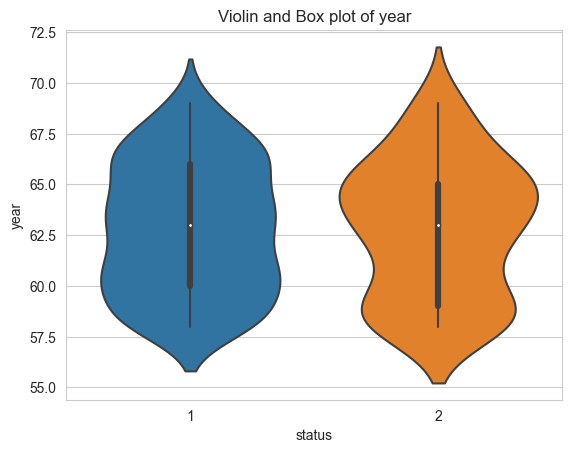

In [37]:
import seaborn as sns
print('Violin plot for nodes')
sns.violinplot(x='status', y='nodes', data=haberman, size=8)
plt.title('Violin and Box plot of nodes')
plt.show()

print('Violin plot for age')
sns.violinplot(x='status', y='age', data=haberman, size=8)
plt.title('Violin and Box plot of age')
plt.show()

print('Violin plot for year')
sns.violinplot(x='status', y='year', data=haberman, size=8)
plt.title('Violin and Box plot of year')
plt.show()

In [ ]:
Observations:

From Voilin and box plot of nodes i) Status 1 patients: 25 % and 50 % of the patients coincide at 0 node and 75% of the patients lie from 0 to 3 nodes. The majority of the density lies between 0 to 5 nodes which in nearly 85% of these patients and maximum no. of such patients have 0 nodes ii) Status 2 patients: 25 % of the patients lie at 0 node, 50 % from 0 to 3 nodes and 75% of the patients lie from 0 to 11 nodes. The majority of the density lies between 0 to 12 nodes which in nearly 55% of these patients and maximum no. of such patients have 2 nodes

From Voilin and box plot of age i) Status 1 patients: 25 % of the patients lie in the age range of 30 to 44 years, 50 % of the patients lie in the age range of 30 to 52 years and 75% of the patients lie in the range of 30 to 60 years. The maximum no. of such patients are of 54 years of age. ii) Status 2 patients: 25 % of the patients lie in the age range of 34 to 46 years, 50 % of the patients lie in the age range of 34 to 54 years and 75% of the patients lie in the range of 34 to 62 years. The maximum no. of such patients are of 50 years of age.

The violin and box plots of both the types of patients are almost identical to each other

From Voilin and box plot of year i) Status 1 patients: 25 % of the patients have undergone a surgery between 1958 - 1960 , 50 % of the patients have undergone a surgery between 1958 - 1963 and 75% of the patients have undergone a surgery between 1958 - 1966. The maximum no. of such patients have undergone a surgery at 1960. ii) Status 2 patients: 25 % of the patients have undergone a surgery between 1958 - 1959 , 50 % of the patients have undergone a surgery between 1958 - 1963 and 75% of the patients have undergone a surgery between 1958 - 1965. The maximum no. of such patients have undergone a surgery at 1964.
The violin and box plots of both the types of patients are alomst identical in its range and behavoir with the only difference in their maximum density points.

# 4.4 Conclusion from Univariate Analysis using pdf, cdf,histogram, voilin and Box plots:
Using nodes to classify the patient's status is more promoninent than the other two (age and year).
Use of nodes to classify the data gives us an accuracy of 85% to pridict of the patients of "status 1" and accuracy of 44% to predict for "status 2"

# 5.Conclusion from EDA performed and Haberman's cancer survival data set
The data set has 306 datapoints (rows) and 4 columns
The name of the columns are age, year, nodes and status where age, year, nodes are the features and status consists the classes of the Haberman's data set. So, this data set has 3 fetaures and 2 classes (status 1 and status 2)
There are 225 data points for class 1 (status 1) and 81 data points for class 2 (status 2).
For Haberman's data set Bivariate analaysis did not give a clear picture in order to define as logic to classify the patients as fro all the features majority of data points overlap each other.
Univariate Analysis gave better clarity in order to choose a feature with which we can classify the patients based on the class in the best possible way
Nodes turned out to be the best feature out of the 3 features.
Use of nodes to classify the data gives us an accuracy of 85% to predict of the patients of "status 1" and accuracy of 44% to predict for "status 2"